#### Student Performance Indicator

# Life cycle of Machine Learning Project

. Understand the Problem Statement
. Data Collection
. Data checks to perform
. Exploratory data analysis
. Data Pre-processing
. Model Training
. Choose best Model

1) Problem statement
   . This project understands how the student's performance is affected by other varaiables such as gender, Ethnicity,Parental level of education, Lunch and test preperation course

2. Data Collection
    . Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
    .The data consists of 8 columns and 1000 rows

2.1 Import Data and Required Packages

    Importing Pandas,Numpy,Matplotlib,Seaborn and Warnings Library

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Student.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

## Data Checks to perform
. Check for missing values
. Check duplicates
. Check the number of unique value of each column
. Check statistics of data set
. Check variours categories present in the different categorical column

In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [20]:
print("Categories in 'gender' variable : ",end=" ")
print(df["gender"].unique())
print("Categories in 'race/enthicity' variable : ",end=" ")
print(df["race/ethnicity"].unique())
print("Categories in 'parental level of education' variable : ",end=" ")
print(df["parental level of education"].unique())
print("Categories in 'lunch' variable : ",end=" ")
print(df["lunch"].unique())
print("Categories in 'test preparation course' variable : ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/enthicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [21]:
## Defining numerical and categorical columns
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [22]:
num_features

['math score', 'reading score', 'writing score']

In [23]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [24]:
# Adding the columns "Total score" and "Average"

In [26]:
df["total_score"] = df["math score"] + df["reading score"] + df['writing score']
df["average"] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df["reading score"] == 100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f"Number of students with full marks in math :{math_full}")
print(f"Number of students with full marks in writing :{writing_full}")
print(f"Number of students with full marks in reading :{reading_full}")

Number of students with full marks in math :7
Number of students with full marks in writing :14
Number of students with full marks in reading :17


In [34]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with less that 20 marks in math :{math_less_20}")
print(f"Number of students with less that 20 marks in writing :{writing_less_20}")
print(f"Number of students with less that 20 marks in reading :{reading_less_20}")


Number of students with less that 20 marks in math :4
Number of students with less that 20 marks in writing :3
Number of students with less that 20 marks in reading :1


In [35]:
# Histogram & KDE

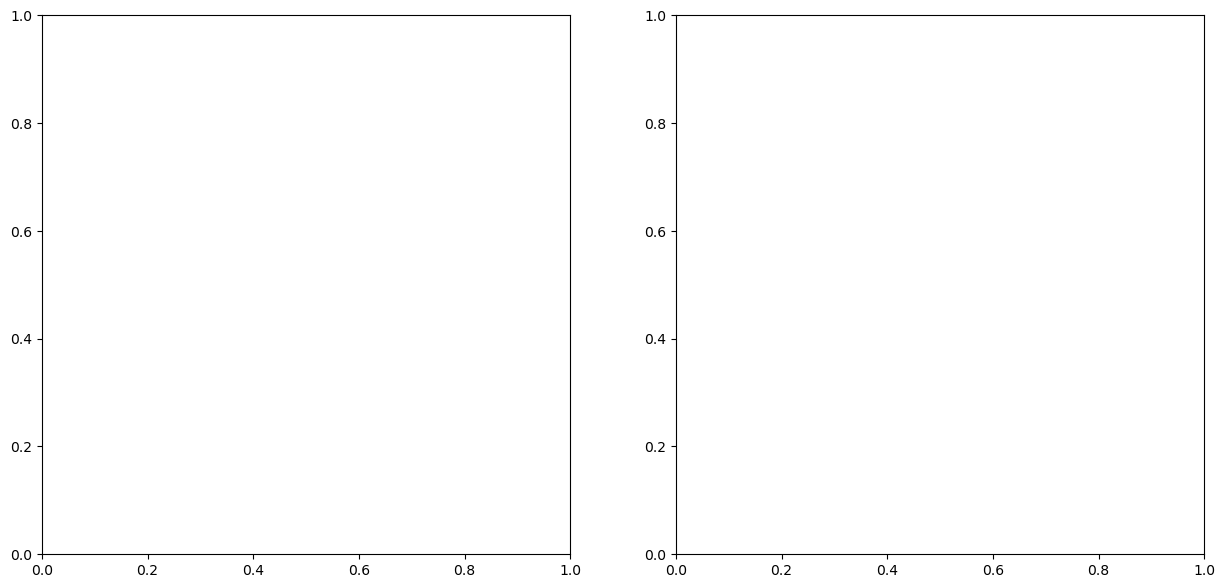

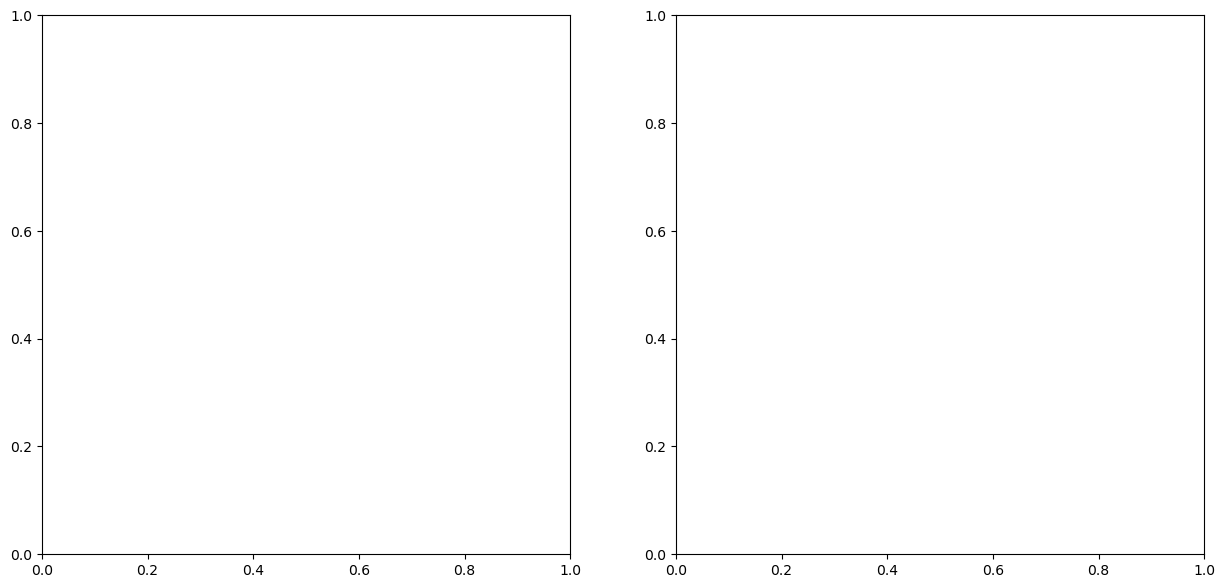

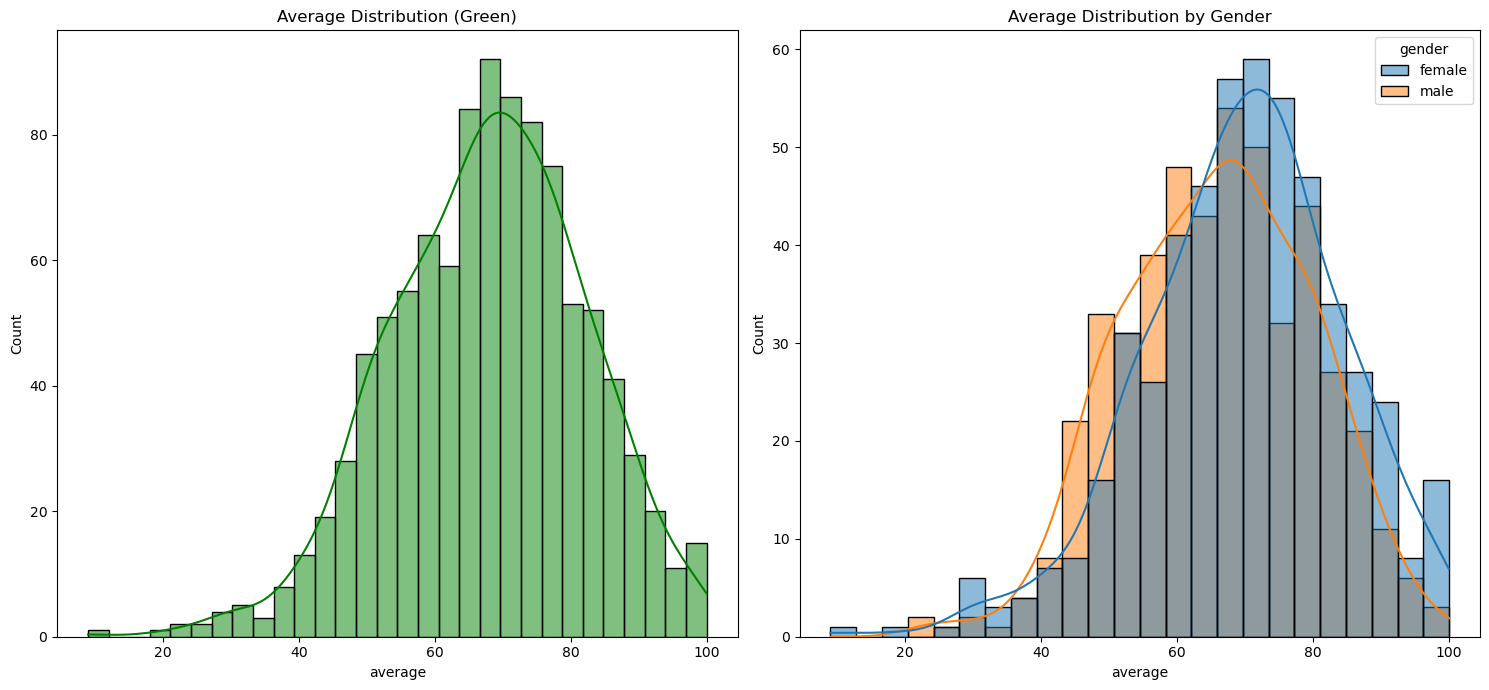

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot (just x='average' with KDE)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Average Distribution (Green)')

# Second plot (with hue='gender')
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Distribution by Gender')

plt.tight_layout()
plt.show()

In [42]:
plt.subplot(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avearge',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given